# Principal Component Regression
Author: Deep Contractor

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
data = pd.read_csv("peach_spectra+brixvalues.csv")

In [46]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [47]:
data.shape

(50, 601)

In [48]:
data_x = data.iloc[:,2:601]
data_y = data.iloc[:,0:1]

In [49]:
data_x.head()

,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [50]:
data_y.head()

,Brix
0,15.5
1,16.7
2,18.1
3,14.8
4,15.1


In [51]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
#scaling my data first so that it becomes unitless
scaler=StandardScaler()
scaler.fit(data_x)
scaled_data_x = scaler.transform(data_x)

In [53]:
scaled_data_x

array([[ 0.20079305,  0.200285  ,  0.1992717 , ..., -0.63548956,
        -0.5833462 , -0.53124398],
       [-1.10935402, -1.10910971, -1.10846047, ...,  0.36353815,
         0.31327822,  0.25637486],
       [-1.27831196, -1.27878748, -1.28001049, ...,  0.69759041,
         0.65377562,  0.60204616],
       ...,
       [-0.32345112, -0.32291901, -0.3223646 , ...,  0.16521327,
         0.19581224,  0.22745952],
       [-1.06574359, -1.06629485, -1.0679882 , ...,  1.02851684,
         1.05398916,  1.08044711],
       [ 0.15522474,  0.15469685,  0.15409192, ..., -0.82810213,
        -0.83480161, -0.83916053]])

In [54]:
scaled_data_x.shape

(50, 599)

In [55]:
pca = PCA()
pca.fit(scaled_data_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
data_x_pca = pca.transform(scaled_data_x)
pca.explained_variance_ratio_


array([7.98925504e-01, 1.45631178e-01, 3.39523102e-02, 1.30145288e-02,
       4.60644725e-03, 1.72042029e-03, 8.10497703e-04, 5.53299733e-04,
       2.92827525e-04, 2.14499014e-04, 9.53700468e-05, 4.81381426e-05,
       2.88311591e-05, 2.66572692e-05, 2.35759678e-05, 1.05155485e-05,
       8.83533772e-06, 6.17983959e-06, 5.61999462e-06, 3.81323385e-06,
       3.52112405e-06, 2.78910984e-06, 2.29181640e-06, 1.64528617e-06,
       1.38715766e-06, 1.21374508e-06, 9.85233315e-07, 9.13731425e-07,
       7.85259407e-07, 6.91097088e-07, 6.10246300e-07, 5.22628952e-07,
       4.67171072e-07, 4.27763995e-07, 3.83450351e-07, 3.47626278e-07,
       3.09614887e-07, 2.62718673e-07, 2.46721194e-07, 2.02878879e-07,
       1.67587782e-07, 1.59593909e-07, 1.43105333e-07, 1.07161034e-07,
       9.81200857e-08, 8.73547403e-08, 7.62117212e-08, 6.25070400e-08,
       4.51476472e-08, 4.96881160e-33])

In [58]:
# havinf visual error : explained_variance=pca.explained_variance_ratio_
# with plt.style.context('dark_background'):
#     plt.figure(figsize=(6, 4))

#     plt.bar(range(13), explained_variance, alpha=0.5, align='center',label='individual explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [59]:
data_x_pca.shape

(50, 50)

In [61]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [62]:
data_x_pca

array([[-1.09637555e+01, -1.72847229e+01, -1.08892277e+01, ...,
        -1.64190253e-03, -2.81604841e-04, -5.80785420e-15],
       [-9.65992643e+00,  1.90736130e+01, -2.31627762e+00, ...,
         5.34026016e-03,  8.19815705e-04,  7.02042591e-15],
       [-2.62580102e+01,  1.05700238e+01, -3.27838298e+00, ...,
         7.03516400e-03,  6.46629645e-03, -5.30131494e-15],
       ...,
       [ 2.44305923e+00,  4.65401330e+00,  2.22206996e+00, ...,
        -8.75925330e-04, -9.43781577e-04,  4.05274772e-16],
       [-2.90653500e+01, -7.94785045e+00, -2.17126829e+00, ...,
         3.11774953e-03, -6.57781915e-03,  3.22311622e-15],
       [ 1.12630083e+01,  4.26458268e+00, -2.79272155e+00, ...,
        -4.58755870e-03,  4.74178879e-03,  9.49240686e-15]])

In [63]:
pca_df = pd.DataFrame(data_x_pca)
pca_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,-5.164277e-15,2.376783e-16,0.000000e+00,1.189716e-15,-2.385287e-15,4.125510e-15,-9.125870e-16,2.890826e-15,6.352075e-15,...,-3.303998e-14,-7.697740e-15,-1.246173e-13,-4.964658e-14,1.250797e-13,1.607510e-14,3.083419e-15,-6.867978e-14,-5.115023e-14,0.001902
1,-5.164277e-15,1.000000e+00,-1.344750e-14,5.858149e-17,4.325115e-16,-3.662737e-16,3.644027e-16,-9.167670e-17,-8.798568e-16,-4.472920e-15,...,-3.393060e-14,4.899895e-15,9.700924e-14,2.539304e-14,1.451189e-14,-2.918783e-14,2.525287e-14,5.627578e-14,7.517432e-14,0.186725
2,2.376783e-16,-1.344750e-14,1.000000e+00,-1.137499e-14,-3.190874e-16,-3.336952e-16,-7.024076e-16,1.996178e-15,3.221242e-16,3.406574e-16,...,-1.897363e-14,1.605956e-15,-3.394565e-14,-1.329646e-14,7.018518e-15,-7.763872e-15,-2.459471e-16,-9.906161e-15,-2.672361e-14,-0.070593
3,0.000000e+00,5.858149e-17,-1.137499e-14,1.000000e+00,-8.526682e-16,5.656126e-16,-1.187016e-16,-6.534014e-16,1.201979e-15,1.371119e-15,...,2.656547e-15,-2.319391e-15,1.204955e-14,-5.676516e-16,-1.179080e-14,-1.879717e-15,-5.392278e-15,-1.151431e-15,-1.599511e-14,0.083990
4,1.189716e-15,4.325115e-16,-3.190874e-16,-8.526682e-16,1.000000e+00,-1.048157e-14,-2.635495e-16,5.144538e-16,3.957729e-16,9.747242e-16,...,-2.899787e-15,1.866506e-16,-2.418057e-15,2.196351e-15,-7.638120e-15,7.351639e-15,1.401049e-14,3.810197e-16,-9.612158e-15,-0.086694
5,-2.385287e-15,-3.662737e-16,-3.336952e-16,5.656126e-16,-1.048157e-14,1.000000e+00,-1.946310e-16,7.693801e-16,-2.429834e-15,-2.158639e-15,...,-4.763181e-15,1.714538e-15,-1.014021e-14,-2.965245e-15,-4.848600e-15,-3.336071e-15,4.560065e-15,8.193733e-15,5.839236e-15,-0.084451
6,4.125510e-15,3.644027e-16,-7.024076e-16,-1.187016e-16,-2.635495e-16,-1.946310e-16,1.000000e+00,-1.383876e-18,3.424081e-17,-4.956439e-16,...,9.489777e-15,2.723329e-15,9.341776e-15,-4.678319e-15,-7.750148e-15,7.484171e-15,-1.069704e-14,8.808886e-15,4.859326e-15,0.081465
7,-9.125870e-16,-9.167670e-17,1.996178e-15,-6.534014e-16,5.144538e-16,7.693801e-16,-1.383876e-18,1.000000e+00,4.834889e-16,-3.201161e-16,...,-7.650265e-16,2.006301e-15,9.812566e-15,-5.744946e-16,-6.750578e-16,4.810253e-15,-3.570045e-15,-3.749977e-15,-7.851361e-15,0.072339
8,2.890826e-15,-8.798568e-16,3.221242e-16,1.201979e-15,3.957729e-16,-2.429834e-15,3.424081e-17,4.834889e-16,1.000000e+00,-9.022453e-16,...,2.542444e-16,-2.130872e-15,3.216610e-15,7.249440e-15,-9.903324e-15,2.490827e-15,-2.145629e-16,-1.421518e-16,-1.193937e-14,-0.000078
9,6.352075e-15,-4.472920e-15,3.406574e-16,1.371119e-15,9.747242e-16,-2.158639e-15,-4.956439e-16,-3.201161e-16,-9.022453e-16,1.000000e+00,...,-2.375275e-15,6.867768e-17,1.620409e-16,-3.577482e-15,-2.434316e-15,-1.298300e-14,7.771586e-16,-5.051929e-15,2.345167e-15,0.049890


Text(0.5, 1.0, 'Correlation between different fearures')

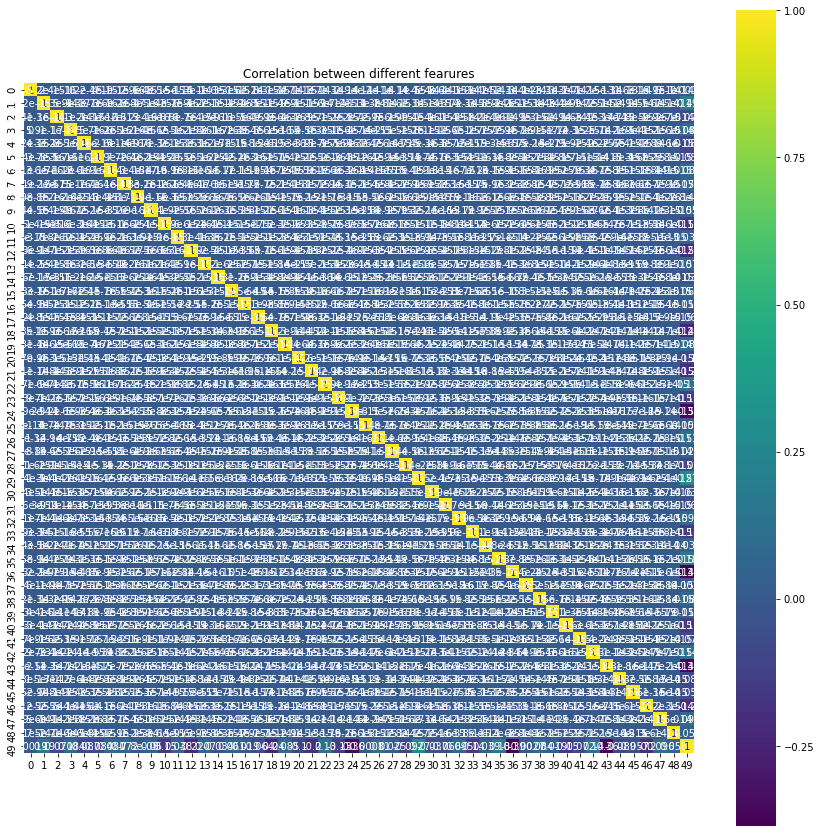

In [64]:

correlation = pca_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

In [65]:
from sklearn import linear_model
lcn_model = linear_model.LinearRegression()

In [66]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-10.963755,-17.284723,-10.889228,-0.131788,1.306730,0.432836,-0.276491,-0.869282,0.641739,-0.064879,...,0.015544,0.001213,-0.004542,0.013056,0.003030,-0.003952,0.004032,-0.001642,-0.000282,-5.807854e-15
1,-9.659926,19.073613,-2.316278,1.471457,1.525771,0.567513,0.627370,-0.260153,0.354173,0.003689,...,0.000060,-0.004212,0.011245,-0.002449,0.005496,-0.000232,0.004517,0.005340,0.000820,7.020426e-15
2,-26.258010,10.570024,-3.278383,1.346048,1.897753,-1.008651,-0.236567,0.370328,0.215563,0.007725,...,-0.011117,-0.022761,-0.009171,0.016845,-0.006007,-0.003837,0.002451,0.007035,0.006466,-5.301315e-15
3,-21.012704,-5.183368,5.991921,2.663534,2.796270,0.616094,-1.157912,-0.455250,0.354348,0.730477,...,-0.004447,0.011546,-0.005399,-0.005294,-0.009867,0.002888,-0.005572,0.001004,0.001433,5.689893e-16
4,-11.601435,-0.192399,-1.436846,-1.386877,1.416934,-0.941051,0.004059,0.556105,0.132349,0.321167,...,0.003415,-0.002628,0.021605,-0.004046,0.008782,0.000831,0.003793,-0.014738,0.008187,-1.249543e-15


In [67]:
#selecting the first 37 Principal components
selected_pca = pca_df.iloc[:,0:37]

In [68]:
lcn_model.fit(selected_pca,data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lcn_model.score(selected_pca,data_y)

0.9250126283699999

## THERE WE HAVE IT A PERFECT MODEL SCORE OF 0.92